# Random Forest Regression Code Demo

- **Objective**: Develop a Random Forest regression model.
- **Dataset**: Use regression model to predict petrol consumption.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


Check for **missing values**.

In [46]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

## EDA

In [47]:
#Check quantitative variables statistics
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Create a **correlation diagram** for the quantitative variables.

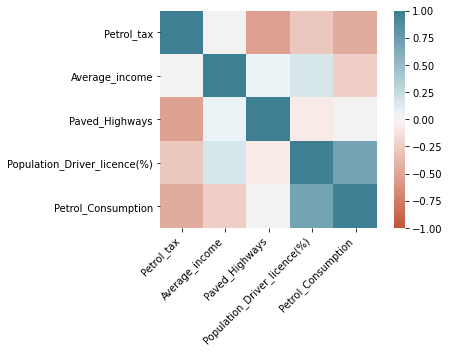

In [48]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Relationship between **average income** and petrol consumption.

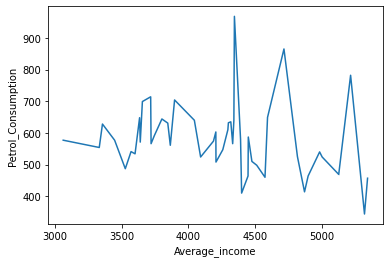

In [50]:
sns.lineplot(data = df, x="Average_income", y="Petrol_Consumption")

## Train Test Split & Preprocessing

In [25]:
X = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Need to **scale** the variables, for the regression model.

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit and transform on the X_train
X_test = sc.transform(X_test) #cannot fit on the test data too, only scale

## Model Building

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30) #number of estimators is number of trees
regressor.fit(X_train, y_train) #training
y_pred = regressor.predict(X_test) #predictions

For **n_estimators** (trees) the larger the better the results. However, the improvement decreases as the number of trees increases, at a certain point the benefit in prediction performance from learning more trees will be lower than the computational cost for learning the additional trees.

## Evaluate Model 

Need to evaluate **RMSE** for the regression problem.

In [43]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 59.762518911661246
